In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.models import model_from_json

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

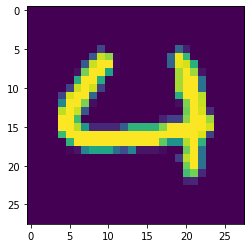

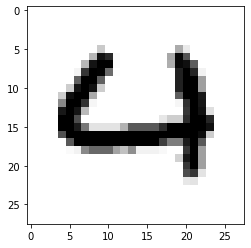

In [6]:
plt.imshow(X_train[60])
plt.show()

plt.imshow(X_train[60], cmap=plt.cm.binary)
plt.show()

In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Normalizing the Data (Pre-Processing Step) (Converting the numbers by dividing it by 255)

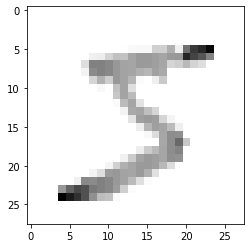

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()


In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
y_train[0] # Targeted value

5

In [11]:
IMG_SIZE = 28
 # (no of samples, img_size, img_size, rgb (3) or gray (1))
X_trainr = np.array(X_train).reshape(len(X_train), IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(len(X_test), IMG_SIZE, IMG_SIZE, 1)

print(f"Training Samples Dimension: {X_trainr.shape}")
print(f"Testing Samples Dimension: {X_testr.shape}")

Training Samples Dimension: (60000, 28, 28, 1)
Testing Samples Dimension: (10000, 28, 28, 1)


In [12]:
X_trainr[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Creating a Deep Neural Network
**Training on 60,000 Samples of MNIST Handwritten dataset**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))
          
model.add(Dense(10))
model.add(Activation("softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.fit(X_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 24s 17ms/step - loss: 0.3242 - accuracy: 0.8993 - val_loss: 0.1453 - val_accuracy: 0.9563
Epoch 2/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1057 - accuracy: 0.9683 - val_loss: 0.1108 - val_accuracy: 0.9651
Epoch 3/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.0831 - val_accuracy: 0.9762
Epoch 4/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0673 - val_accuracy: 0.9798
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0467 - accuracy: 0.9849 - val_loss: 0.0706 - val_accuracy: 0.9798


In [18]:
predictions = model.predict([X_testr])

In [19]:
print(predictions)

[[4.1680798e-10 1.1247058e-05 9.7233533e-07 ... 9.9998748e-01
  8.9715885e-10 4.7097799e-08]
 [3.8151798e-06 1.0725621e-05 9.9982232e-01 ... 1.2704181e-04
  1.9971098e-05 1.2806580e-06]
 [1.3176159e-06 9.9986804e-01 2.0196835e-07 ... 1.0350291e-05
  7.1292749e-07 2.4028452e-07]
 ...
 [2.6006827e-11 4.7729504e-08 2.4083223e-08 ... 1.2724240e-07
  1.5324121e-06 2.5680579e-06]
 [6.2835454e-08 4.4720374e-09 1.2424457e-10 ... 1.2205132e-09
  3.2906739e-06 4.3517684e-07]
 [1.7862907e-06 1.2643030e-10 9.7379221e-08 ... 1.0604755e-09
  1.0654453e-06 1.8571144e-07]]


In [20]:
print(np.argmax(predictions[0]))

7


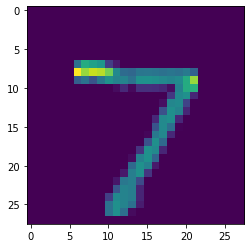

In [21]:
plt.imshow(X_test[0])
plt.show()

In [22]:
import cv2

In [23]:
img = cv2.imread("test6.png")

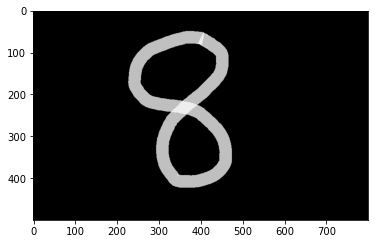

In [24]:
plt.imshow(img)
plt.show()

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [26]:
gray.shape

(500, 800)

In [27]:
resized = cv2.resize(gray, (28,28))

In [28]:
resized.shape

(28, 28)

In [29]:
new_img = tf.keras.utils.normalize(resized, axis=1)

In [30]:
new_img = np.array(new_img).reshape(1, IMG_SIZE, IMG_SIZE, 1)

In [31]:
new_img

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

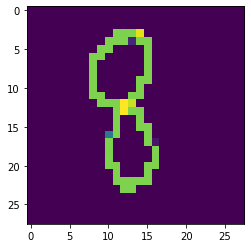

In [32]:
plt.imshow(resized)
plt.show()

In [33]:
prediction = model.predict(new_img)

In [34]:
prediction

array([[1.8146145e-09, 2.0701541e-13, 5.2661442e-10, 7.9422688e-13,
        4.7152301e-07, 2.4268059e-09, 4.8019791e-07, 2.8554370e-13,
        9.9999905e-01, 1.3088945e-08]], dtype=float32)

In [35]:
print(np.argmax(prediction))

8


In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0688 - accuracy: 0.9794


[0.06880677491426468, 0.9793999791145325]

In [37]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")

In [38]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")

In [39]:
prediction = loaded_model.predict(new_img)

In [40]:
print(np.argmax(prediction))

8
